# Intro

Welcome to the interactive labeling notebook!

The notebook proceeds as follows:

1. **Import** libraries
2. Define **paths** to data
3. **Label** ROI images using a simple GUI
4. **Visualize** results
5. **Save** results


- If you need to restart a session, don't worry. Your results are continuously saved in the CSV file and you can just start from where you left off.
- We recommend labeling one session at a time so that the results can be saved with the data.

# Import libraries

Widen the notebook

In [3]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

Import basic libraries

In [4]:
from pathlib import Path
import tempfile

import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt

Import `roicat`

In [5]:
import roicat

In [6]:
# Import vrAnalysis related code
from vrAnalysis import database

# Find paths to data

##### Prepare list of paths to data

In this example we are using suite2p output files, but other data types can be used (CaImAn, etc.) \
See the notebook on ingesting diverse data: https://github.com/RichieHakim/ROICaT/blob/main/notebooks/jupyter/other/demo_data_importing.ipynb

Make a list containing the paths to all the input files.

In this example we are using suite2p, so the following are defined:
1. `paths_allStat`: a list to all the stat.npy files
2. `paths_allOps`: a list with ops.npy files that correspond 1-to-1 with the stat.npy files

In [ ]:
dir_data = r'/media/rich/bigSSD/other_lab_data/Allen_institute/David_Feng'

paths_stat = roicat.helpers.find_paths(
    dir_outer=dir_data,
    reMatch='stat\.npy',
    depth=5,
)

display(paths_stat)

paths_ops = [str(Path(p).parent / 'ops.npy') for p in paths_stat]

display(paths_ops)

In [7]:
# Create link to vrDatabase containing all data and get session paths for target mouse
mouseName = "ATL027"
vrdb = database.vrDatabase('vrSessions')
ises = vrdb.iterSessions(imaging=True, mouseName=mouseName, dontTrack=False)
pathList = []
for ses in ises:
    pathList.append(ses.sessionPath())
for idx, pl in enumerate(pathList): print(idx, pl)

0 C:\Users\andrew\Documents\localData\ATL027\2023-07-19\701
1 C:\Users\andrew\Documents\localData\ATL027\2023-07-20\701
2 C:\Users\andrew\Documents\localData\ATL027\2023-07-21\701
3 C:\Users\andrew\Documents\localData\ATL027\2023-07-24\701
4 C:\Users\andrew\Documents\localData\ATL027\2023-07-25\701
5 C:\Users\andrew\Documents\localData\ATL027\2023-07-26\701
6 C:\Users\andrew\Documents\localData\ATL027\2023-07-27\701
7 C:\Users\andrew\Documents\localData\ATL027\2023-07-28\701
8 C:\Users\andrew\Documents\localData\ATL027\2023-08-01\701
9 C:\Users\andrew\Documents\localData\ATL027\2023-08-02\701
10 C:\Users\andrew\Documents\localData\ATL027\2023-08-04\702
11 C:\Users\andrew\Documents\localData\ATL027\2023-08-07\701
12 C:\Users\andrew\Documents\localData\ATL027\2023-08-08\701
13 C:\Users\andrew\Documents\localData\ATL027\2023-08-09\701


In [19]:
# dir_allOuterFolders = pathList[10] #r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0403L/stat_and_ops'

dir_allOuterFolders = pathList[0].parent.parent
reMatch_in_path = "plane1"

pathSuffixToStat = 'stat.npy'
pathSuffixToOps = 'ops.npy'

paths_stat = roicat.helpers.find_paths(
    dir_outer=dir_allOuterFolders,
    reMatch=pathSuffixToStat,
    reMatch_in_path=reMatch_in_path,
    depth=6,
)[:]
paths_stat += roicat.helpers.find_paths(
    dir_outer=dir_allOuterFolders,
    reMatch=pathSuffixToStat,
    reMatch_in_path="plane3",
    depth=6,
)[:]
paths_ops  = np.array([Path(path).resolve().parent / pathSuffixToOps for path in paths_stat])[:]

print(f'paths to all stat files:');
[print(path) for path in paths_stat];
print('');
print(f'paths to all ops files:');
[print(path) for path in paths_ops];

paths to all stat files:
C:\Users\andrew\Documents\localData\ATL027\2023-07-18\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-19\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-20\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-21\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-24\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-25\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-26\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-27\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-07-28\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-08-01\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-08-02\701\suite2p\plane1\stat.npy
C:\Users\andrew\Documents\localData\ATL027\2023-08-04\702\suite2p\plane1\

In [20]:
data = roicat.data_importing.Data_suite2p(
    paths_statFiles=paths_stat,
    paths_opsFiles=paths_ops,
    new_or_old_suite2p='new',
    verbose=True,
)

assert data.check_completeness(verbose=False)['classification_inference'], f"Data object is missing attributes necessary for tracking."

c:\users\andrew\documents\github\roicat\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] The system cannot find the file specified
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


Starting: Importing FOV images from ops files
Completed: Set FOV_height and FOV_width successfully.
Completed: Imported 32 FOV images.
Setting FOV_images...
Completed: Set FOV_images for 32 sessions successfully.
Importing spatial footprints from stat files.


100%|██████████| 32/32 [00:14<00:00,  2.18it/s]


Imported 32 sessions of spatial footprints into sparse arrays.
Completed: Set spatialFootprints for 32 sessions successfully.
Completed: Created session_bool.
Completed: Created centroids.
Starting: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.


# ROInet embedding

This step passes the images of each ROI through the ROInet neural network. The inputs are the images, the output is an array describing the visual properties of each ROI.

##### 1. Initialize ROInet

Initialize the ROInet object. The `ROInet_embedder` class will automatically download and load a pretrained ROInet model. If you have a GPU, this step will be much faster.

In [21]:
DEVICE = roicat.helpers.set_device(use_GPU=True, verbose=True)
dir_temp = tempfile.gettempdir()

roinet = roicat.ROInet.ROInet_embedder(
    device=DEVICE,  ## Which torch device to use ('cpu', 'cuda', etc.)
    dir_networkFiles=dir_temp,  ## Directory to download the pretrained network to
    download_method='check_local_first',  ## Check to see if a model has already been downloaded to the location (will skip if hash matches)
    download_url='https://osf.io/c8m3b/download',  ## URL of the model
    download_hash='357a8d9b630ec79f3e015d0056a4c2d5',  ## Hash of the model file
    forward_pass_version='head',  ## How the data is passed through the network
    verbose=True,  ## Whether to print updates
)

roinet.generate_dataloader(
    ROI_images=data.ROI_images,  ## Input images of ROIs
    um_per_pixel=data.um_per_pixel,  ## Resolution of FOV
    pref_plot=False,  ## Whether or not to plot the ROI sizes
);
images = roinet.ROI_images_rs

Using device: cuda:0


c:\users\andrew\documents\github\roicat\roicat\util.py:416: UserWarning: RH WARNING: unable to get gcc version. Got error: [WinError 2] The system cannot find the file specified
  warnings.warn(f'RH WARNING: unable to get gcc version. Got error: {e}')


File already exists locally: C:\Users\Andrew\AppData\Local\Temp\ROInet.zip
Hash of local file matches provided hash_hex.
Extracting C:\Users\Andrew\AppData\Local\Temp\ROInet.zip to C:\Users\Andrew\AppData\Local\Temp.
Completed zip extraction.
Imported model from C:\Users\Andrew\AppData\Local\Temp\ROInet_classification_20220902\model.py
Loaded params_model from C:\Users\Andrew\AppData\Local\Temp\ROInet_classification_20220902\params.json


C:\Users\Andrew\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Andrew\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from C:\Users\Andrew\AppData\Local\Temp\ROInet_classification_20220902\ConvNext_tiny__1_0_unfrozen__simCLR.pth
Loaded network onto device cuda:0
Starting Image Resizer
Creating dataloader
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader


##### 2. Check ROI_images sizes
In general, you want to see that a neuron fills roughly 25-50% of the area of the image. \
**Adjust `um_per_pixel` above to rescale image size**


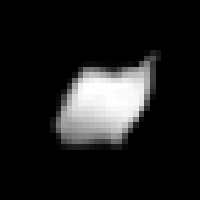

In [23]:
roicat.visualization.display_toggle_image_stack(images[:1000], image_size=(200,200))

##### 3. Pass data through network

Pass the data through the network. Expect for large datasets (~40,000 ROIs) that this takes around 15 minutes on CPU or 1 minute on GPU.

In [24]:
roinet.generate_latents();

starting: running data through network


  0%|          | 0/11399 [00:01<?, ?it/s]

completed: running data through network


# UMAP embedding

Reduce the dimensionality of the output of ROInet (~100 dims) to 2 dimensions so that we can visualize it. Feel free to use any settings here that do a good job of clustering your data as you see fit.

In [25]:
model_umap = UMAP(
    n_neighbors=25,
    n_components=2,
    n_epochs=400,
    verbose=True,
    densmap=False,
)
emb = model_umap.fit_transform(roinet.latents)

UMAP(n_epochs=400, n_neighbors=25, verbose=True)
Thu Dec 19 10:38:25 2024 Construct fuzzy simplicial set
Thu Dec 19 10:38:25 2024 Finding Nearest Neighbors
Thu Dec 19 10:38:25 2024 Building RP forest with 20 trees
Thu Dec 19 10:38:28 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Dec 19 10:38:36 2024 Finished Nearest Neighbor Search
Thu Dec 19 10:38:39 2024 Construct embedding


Epochs completed:   0%|            0/400 [00:00]

	completed  0  /  400 epochs
	completed  40  /  400 epochs
	completed  80  /  400 epochs
	completed  120  /  400 epochs
	completed  160  /  400 epochs
	completed  200  /  400 epochs
	completed  240  /  400 epochs
	completed  280  /  400 epochs
	completed  320  /  400 epochs
	completed  360  /  400 epochs
Thu Dec 19 10:38:55 2024 Finished embedding


# Label data

How to use this GUI:
- Each image will be shown one at a time. You can go to previous and next images by using the ***Left*** and ***Right*** arrow keys, and can close the GUI by pressing the ***Escape*** key.
- Label the image by pressing any key on your keyboard. This key will be used as the label. After each key press, the following occurs:
    1. The results will be saved as a CSV file at `path_csv` (will be a temporary file if not specified)
    2. The results will also be stored in the python object as `ImageLabeler_obj.labels_`.
    2. The GUI should progress to the next image.
    3. Finish labeling by closing out of the GUI window or pressing the user defined '`end_key`' (***Escape*** by default).
- The results are stored in a temporary CSV file with two columns: 'index' and 'label'. This file can be used to recover lost labeling session data. We will save more comprehensive results files at the end of the notebook.
    - **'index'**: The index within the data object. 0-indexed.
    - **'label'**: The key pressed for that image in the labeling GUI.
- To start at a different image index than 0, change the `start_index` argument.

In [26]:
# The images are what we will label and will be shown on the left
images = np.concatenate(data.ROI_images, axis=0)

# The idx to the overlay images is designed to pick images to show that
# are well spread out in the embedding space from UMAP
idx_images_overlay = roicat.visualization.get_spread_out_points(
    emb,
    n_ims=min(emb.shape[0], 1500),  ## Select number of overlayed images here
    dist_im_to_point=0.8,
)

In [72]:
with roicat.helpers.IntegratedLabeler(
    images,
    embeddings=emb,
    idx_images_overlay=idx_images_overlay,
    size_images_overlay=0.25,
    frac_overlap_allowed=0.25,
    crop_images_overlay=0.25,
    alpha_points=1.0,
    size_points=3.0,
) as labeler:
    labeler.run()
    
labels = {
    'labels_list': labeler.get_labels(kind='list'),
    'labels_dict': labeler.get_labels(kind='dict'),
    'labels_df': labeler.get_labels(kind='dataframe'),
}

print(f"Number of labeled ROIs: {len(labels['labels_list'])}")
print(f"path to csv file: {labeler.path_csv}")

TypeError: object of type 'NoneType' has no len()

In [29]:
labels = {
    'list': roicat.util.JSON_List(labeler.get_labels(kind='list')),
    'df': labeler.get_labels(kind='dataframe'),
}

# Visualize results

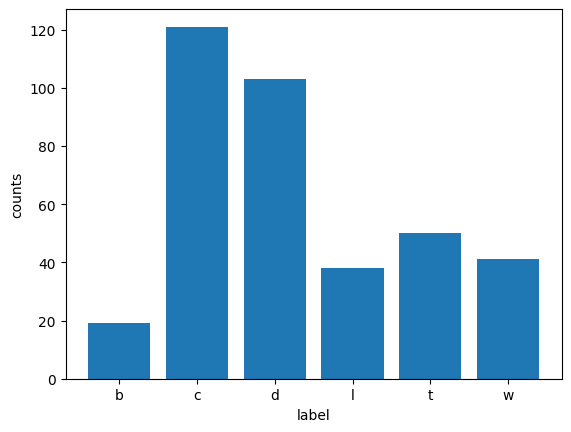

In [30]:
u, c = np.unique(labels['df']['label'], return_counts=True)

plt.figure()
plt.bar(u, c);
plt.xlabel('label');
plt.ylabel('counts');

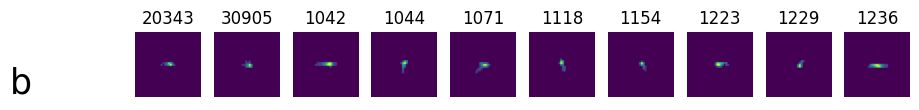

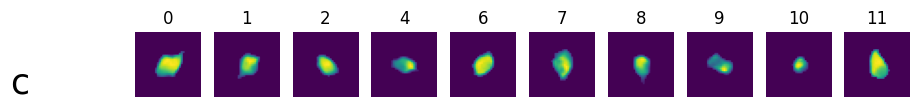

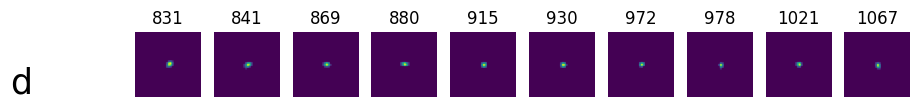

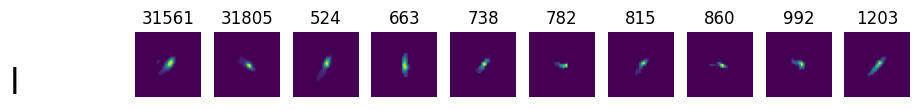

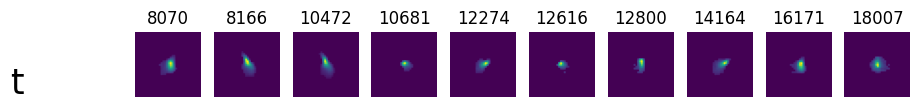

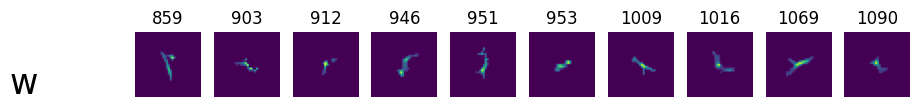

In [31]:
roicat.visualization.display_labeled_ROIs(
    images=images,
#     labels=labels['label'].astype(np.int64),
    labels=labels['df'],
    max_images_per_label=10,
    figsize=(10, 3),
    fontsize=25,
    shuffle=False,
)

# Save results

The results file can be opened using any of the following methods:
1. `roicat.helpers.pickle_load(path)`
2. `np.load(path)`
3. 
``` 
import pickle
with open(path_save, mode='rb') as f:
    test = pickle.load(f)
  ```

##### Make and save results

In [36]:
sum([s.shape[0] for s in data.__dict__["ROI_images"]])

91192

In [61]:
from vrAnalysis import fileManagement as fm

roicat_path = fm.analysisPath() / "roicat"

In [71]:
from sklearn.linear_model import LogisticRegression

labels = {
    'labels_list': labeler.get_labels(kind='list'),
    'labels_dict': labeler.get_labels(kind='dict'),
    'labels_df': labeler.get_labels(kind='dataframe'),
}

unique_labels = set(labels["labels_dict"].values())
unique_ids = range(len(unique_labels))
label_to_id = {label: i for label, i in zip(unique_labels, unique_ids)}

label_to_description = {
    "c": "cell",
    "d": "dendrite",
    "t": "trunk",
    "w": "weird",
    "b": "bad",
    "l": "long",
}

X = np.stack([roinet.latents[i] for i in labels["labels_dict"]])
y = np.stack([label_to_id[labels["labels_dict"][i]] for i in labels["labels_dict"]])

model = LogisticRegression(max_iter=1000).fit(X, y)
print(f"Accuracy: {model.score(X, y)}")

classification_results = dict(
    model=model,
    latents=roinet.latents,
    embeddings=emb,
    labels=labels["labels_dict"],
    labels_to_description=label_to_description,
    labels_to_id=label_to_id,
    paths_stat=paths_stat,
    paths_ops=paths_ops,
)

base_path = roicat_path / "latent_classifier"

from save_classifier import save_classification_results
save_classification_results(classification_results, base_path)

Accuracy: 1.0


In [63]:
print(unique_labels)

{'t', 'l', 'c', 'b', 'w', 'd'}


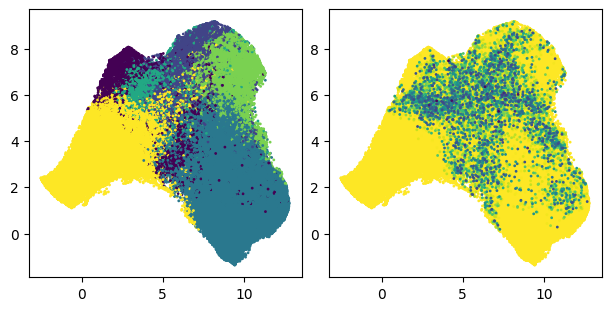

In [60]:
prediction = model.predict(roinet.latents)
proba = model.predict_proba(roinet.latents)
maxprob = np.max(proba, axis=1)
isort = np.argsort(-maxprob)

fig, ax = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")
ax[0].scatter(emb[:, 0], emb[:, 1], c=prediction, s=1)
ax[1].scatter(emb[isort, 0], emb[isort, 1], c=maxprob[isort], s=1)
plt.show()

In [32]:
run_data = {
    "data": data.__dict__,
}
results = {
    "labels": labels,
    "images": images,
}

In [ ]:
## Define the directory to save the results to
dir_save = '/media/rich/bigSSD/data_tmp/test_data/'
name_save = 'mouse_1'

paths_save = {
    'labels':   str(Path(dir_save) / f'{name_save}.labeling.labels.csv'),
    'results':  str(Path(dir_save) / f'{name_save}.labeling.results.richfile'),
    'run_data': str(Path(dir_save) / f'{name_save}.labeling.run_data.richfile'),
}

## Save
labels['df'].to_csv(paths_save['labels'])
roicat.util.RichFile_ROICaT(path=paths_save['results']).save(results, overwrite=True)
roicat.util.RichFile_ROICaT(path=paths_save['run_data']).save(run_data, overwrite=True)

# Thank you
If you encountered any difficulties, please let us know at the issues page: https://github.com/RichieHakim/ROICaT/issues

---
# Extras

## Merge and convert GUI CSV files into a results file

##### 1. Make labels dictionary

In [99]:
import csv

# path_csv = r'/home/rich/Desktop/test.csv'  ## Path to the raw output .csv file from the GUI
path_csv = labeler.path_csv

with open(path_csv, 'r') as f:
    lines = np.array([line for line in csv.reader(f)], dtype=str)

labels_dict = {int(idx): label for idx, label in zip(lines[1:, 0], lines[1:, 1])}

##### 2. Make images array

In [ ]:
dir_data = r'/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/20230420/'


path_stat = str(Path(dir_data) / 'stat.npy')
path_ops = str(Path(dir_data) / 'ops.npy')

data = roicat.data_importing.Data_suite2p(
    paths_statFiles=[path_stat],
    paths_opsFiles=[path_ops],
    new_or_old_suite2p='new',
    verbose=True,
)

assert data.check_completeness(verbose=False)['classification_inference'], f"Data object is missing attributes necessary for tracking."

images = np.concatenate(data.ROI_images, axis=0)

##### 3. Make the results dictionary

In [103]:
import pandas as pd

labels_list = ['None'] * len(labels_dict)
for idx, label in labels_dict.items():
    labels_list[idx] = label

labels_df = pd.DataFrame(index=list(labels_dict.keys()), data=labels_list, columns=['label'])

labels = {
    'list': roicat.util.JSON_List(labels_list),
    'dict': roicat.util.JSON_Dict(labels_dict),
    'df': labels_df,
}

In [104]:
run_data = {
    "data": data.__dict__,
}
results = {
    "labels": labels,
    "images": images,
}

##### 4. Save the results dictionary

In [ ]:
## Define the directory to save the results to
dir_save = '/media/rich/bigSSD/data_tmp/test_data/'
name_save = 'mouse_1'

paths_save = {
    'labels':   str(Path(dir_save) / f'{name_save}.labeling.labels.json'),
    'results':  str(Path(dir_save) / f'{name_save}.labeling.results.richfile'),
    'run_data': str(Path(dir_save) / f'{name_save}.labeling.run_data.richfile'),
}

roicat.helpers.json_save(obj=roicat.util.JSON_List(labels['list']), filepath=paths_save['labels'])
roicat.util.RichFile_ROICaT(path=paths_save['results']).save(results, overwrite=True)
roicat.util.RichFile_ROICaT(path=paths_save['run_data']).save(run_data, overwrite=True)